# MERTON CREDIT MODEL

Check the method for generating correlation Gaussian random numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.models.FinModelMertonCredit import *
from financepy.models.FinModelMertonCreditMkt import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  19 Nov 2020 at 13:09 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Merton Credit Model Market

This is a version of the Merton Credit Model that takes as input the equity value and volatility.

Agrees with results at https://fr.mathworks.com/help/risk/mertonmodel.html

In [40]:
equityValue = [2.6406, 2.6817, 3.977, 2.947, 2.528]
equityVol = [0.7103, 0.3929, 0.3121, 0.4595, 0.6181]
bondFace = [4.0, 3.5, 3.5, 3.2, 4.0]
riskFreeRate = [0.05, 0.05, 0.05, 0.05, 0.05]
assetGrowthRate = [0.0306, 0.03, 0.031, 0.0302, 0.0305]
timeToMaturity = 1.0 #np.linspace(0.1, 10, 100)

In [41]:
model = FinModelMertonCreditMkt(equityValue, bondFace, timeToMaturity, riskFreeRate, assetGrowthRate, equityVol)

In [42]:
model

OBJECT TYPE: FinModelMertonCreditMkt
EQUITY VALUE: [2.6406 2.6817 3.977  2.947  2.528 ]
BOND FACE: [4.  3.5 3.5 3.2 4. ]
YEARS TO MATURITY: [1.]
ASSET GROWTH: [0.0306 0.03   0.031  0.0302 0.0305]
EQUITY VOLATILITY: [0.7103 0.3929 0.3121 0.4595 0.6181]

In [43]:
model.creditSpread()

array([6.46892331e-03, 2.28875517e-05, 9.30381956e-08, 1.23981022e-04,
       2.57202907e-03])

In [44]:
model.leverage()

array([1.60524585, 1.71740765, 2.08751505, 1.872049  , 1.58078598])

In [45]:
model

OBJECT TYPE: FinModelMertonCreditMkt
EQUITY VALUE: [2.6406 2.6817 3.977  2.947  2.528 ]
BOND FACE: [4.  3.5 3.5 3.2 4. ]
YEARS TO MATURITY: [1.]
ASSET GROWTH: [0.0306 0.03   0.031  0.0302 0.0305]
EQUITY VOLATILITY: [0.7103 0.3929 0.3121 0.4595 0.6181]

In [46]:
model.probDefault()

array([6.37907256e-02, 7.67718883e-04, 4.71700036e-06, 2.62227028e-03,
       3.44082712e-02])

In [47]:
model.debtValue()

array([3.78038342, 3.32922679, 3.32930268, 3.04355679, 3.79514391])

In [48]:
model.distDefault()

array([1.52370888, 3.16790104, 4.42975545, 2.79161692, 1.81962231])

## Merton's Basic Model - Credit Spread Term Structure

In [55]:
assetVol = 0.20
bondFace = 100.0
riskFreeRate = 0.05
assetGrowthRate = 0.05
timeToMaturity = np.linspace(0.01,10.,1000)

In [56]:
model1 = FinModelMertonCredit(140.0, bondFace, timeToMaturity, riskFreeRate, assetGrowthRate, assetVol)
model2 = FinModelMertonCredit(115.0, bondFace, timeToMaturity, riskFreeRate, assetGrowthRate, assetVol)
model3 = FinModelMertonCredit(105.0, bondFace, timeToMaturity, riskFreeRate, assetGrowthRate, assetVol)

In [57]:
spd1 = model1.creditSpread() * 10000
spd2 = model2.creditSpread() * 10000
spd3 = model3.creditSpread() * 10000

In [58]:
lvg1 = model1.leverage()
lvg2 = model2.leverage()
lvg3 = model3.leverage()

In [59]:
lvg1, lvg2, lvg3

(1.4, 1.15, 1.05)

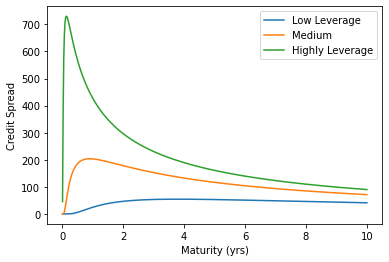

In [60]:
plt.plot(timeToMaturity, spd1, label="Low Leverage")
plt.plot(timeToMaturity, spd2, label="Medium")
plt.plot(timeToMaturity, spd3, label="Highly Leverage")
plt.xlabel("Maturity (yrs)")
plt.ylabel("Credit Spread")
plt.legend();

Copyright (c) 2020 Dominic O'Kane